Dans ce projet, je ferai une analyse de sentiment en python et nous allons utiliser 2 techniques principales
Le premier est l'ancien type d'analyse des sentiments avec un modèle appelé VADER et cela utilise une approche de sac de mots, puis nous verrouillerons le modèle de pré-train du "hugging face" qui est un modèle de type ROBERTA.
Nous utiliserons les critiques d'aliments fins d'Amazon, il s'agit donc de critiques textuelles pour les aliments sur Amazon pour évaluer les aliments.
Refrences:
https://realpython.com/python-nltk-sentiment-analysis/
https://www.youtube.com/watch?v=QpzMWQvxXWk



In [1]:
#Step0:Read in Data and NLTK Basics
import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#Set a style sheet for our plots
plt.style.use('ggplot')

In [3]:
import nltk

In [4]:
#Dataset of Amazon Fine Food reviews"https://www.kaggle.com/datasets/snap/amazon-fine-food-reviews"
df = pd.read_csv(r'F:\uqar-units documents\Sujet speciaux\archive_2\archive_3\Reviews.csv')
print(df.shape)
df=df.head(500)
print(df.shape)



(568454, 10)
(500, 10)


In [6]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


<AxesSubplot:title={'center':'Count of Reviews by Star'}>

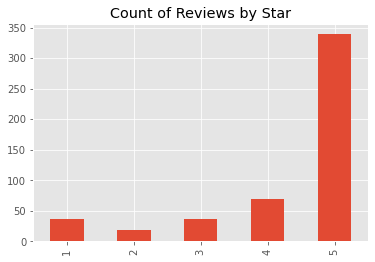

In [7]:

#Quick EDA for getting idea what this data-set looks like

df['Score'].value_counts().sort_index().plot(kind ='bar',title='Count of Reviews by Star')


In [11]:
#Basic NLTK
example=df ['Text'][50]
print(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


In [12]:
token=nltk.word_tokenize(example)
token[:10]

['This', 'oatmeal', 'is', 'not', 'good', '.', 'Its', 'mushy', ',', 'soft']

In [13]:
nltk.pos_tag(token)

[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ'),
 ('.', '.'),
 ('Its', 'PRP$'),
 ('mushy', 'NN'),
 (',', ','),
 ('soft', 'JJ'),
 (',', ','),
 ('I', 'PRP'),
 ('do', 'VBP'),
 ("n't", 'RB'),
 ('like', 'VB'),
 ('it', 'PRP'),
 ('.', '.'),
 ('Quaker', 'NNP'),
 ('Oats', 'NNPS'),
 ('is', 'VBZ'),
 ('the', 'DT'),
 ('way', 'NN'),
 ('to', 'TO'),
 ('go', 'VB'),
 ('.', '.')]

In [14]:
df['Text'].values[0]

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [15]:
print(df.shape)

(500, 10)


In [17]:
words = [w for w in nltk.corpus.state_union.words() if w.isalpha()]

In [18]:
stopwords = nltk.corpus.stopwords.words("english")

In [19]:
words = [w for w in words if w.lower() not in stopwords]

In [20]:
from pprint import pprint

In [21]:
pprint(nltk.word_tokenize(example), width=79, compact=True)

['This', 'oatmeal', 'is', 'not', 'good', '.', 'Its', 'mushy', ',', 'soft', ',',
 'I', 'do', "n't", 'like', 'it', '.', 'Quaker', 'Oats', 'is', 'the', 'way',
 'to', 'go', '.']


In [23]:
words: list[str] = nltk.word_tokenize(example)
fd = nltk.FreqDist(words)

In [25]:
fd.most_common(3)
fd.tabulate(3)

 . is  , 
 3  2  2 


Vader:  valence aware dictionary and sentiment reasoner-Bags of word approach
Cela prend tout le mot dans notre phrase et il a une valeur positive, négative, neutre pour chacun de ces mots et il se combine, il fait juste une équation mathématique pour tous les mots qu'il ajoutera pour vous dire à quel point positif négatif ou neutre que la déclaration est basée sur tous ces mots.
Cela ne tient pas compte des relations entre les mots qui, dans le discours humain, sont très importantes, de sorte que ce modèle VEDAR ne relèverait pas ce type de relation entre les mots.




In [29]:
#Step1.VADER Sentiment scoring
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

In [30]:
#Creat a sentiment analyzer object by calling this sentiment
sia=SentimentIntensityAnalyzer()

In [31]:
#do some example 

In [32]:
sia.polarity_scores('I am so  happy')

{'neg': 0.0, 'neu': 0.334, 'pos': 0.666, 'compound': 0.6115}

In [33]:
sia.polarity_scores('This is the  worst thing ever')

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [34]:
sia.polarity_scores(example)

{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [35]:
#run the polarity score on the entire dataset
res ={}
for i, row in tqdm (df.iterrows(),total=len(df)):
    text = row['Text']
    myid = row['Id']
    res[myid]=sia.polarity_scores(text)

  0%|          | 0/500 [00:00<?, ?it/s]

In [22]:
res

{1: {'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'compound': 0.9441},
 2: {'neg': 0.138, 'neu': 0.862, 'pos': 0.0, 'compound': -0.5664},
 3: {'neg': 0.091, 'neu': 0.754, 'pos': 0.155, 'compound': 0.8265},
 4: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 5: {'neg': 0.0, 'neu': 0.552, 'pos': 0.448, 'compound': 0.9468},
 6: {'neg': 0.029, 'neu': 0.809, 'pos': 0.163, 'compound': 0.883},
 7: {'neg': 0.034, 'neu': 0.693, 'pos': 0.273, 'compound': 0.9346},
 8: {'neg': 0.0, 'neu': 0.52, 'pos': 0.48, 'compound': 0.9487},
 9: {'neg': 0.0, 'neu': 0.851, 'pos': 0.149, 'compound': 0.6369},
 10: {'neg': 0.0, 'neu': 0.705, 'pos': 0.295, 'compound': 0.8313},
 11: {'neg': 0.017, 'neu': 0.846, 'pos': 0.137, 'compound': 0.9746},
 12: {'neg': 0.113, 'neu': 0.887, 'pos': 0.0, 'compound': -0.7579},
 13: {'neg': 0.031, 'neu': 0.923, 'pos': 0.046, 'compound': 0.296},
 14: {'neg': 0.0, 'neu': 0.355, 'pos': 0.645, 'compound': 0.9466},
 15: {'neg': 0.104, 'neu': 0.632, 'pos': 0.264, 'compound': 0.6486},
 

In [36]:
pd.DataFrame(res).T

,neg,neu,pos,compound
1,0.000,0.695,0.305,0.9441
2,0.138,0.862,0.000,-0.5664
3,0.091,0.754,0.155,0.8265
4,0.000,1.000,0.000,0.0000
5,0.000,0.552,0.448,0.9468
...,...,...,...,...
496,0.000,0.554,0.446,0.9725
497,0.059,0.799,0.142,0.7833
498,0.025,0.762,0.212,0.9848
499,0.041,0.904,0.055,0.1280


In [40]:
vaders =pd.DataFrame(res).T


In [41]:
vaders = vaders.reset_index().rename(columns={'index':'Id'})
vaders = vaders.merge(df ,how ='left')

In [42]:
#Now we have sentiment score and metadata
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [43]:
#Plot VADER result

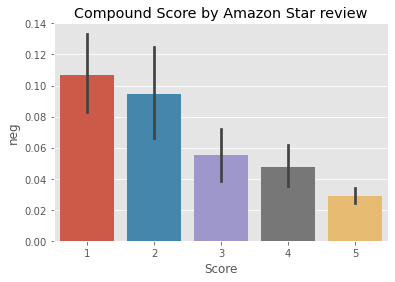

In [27]:
ax=sns.barplot(data=vaders,x='Score',y='neg')
ax.set_title('Compound Score by Amazon Star review')
plt.show()


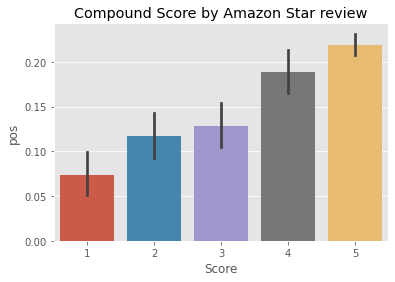

In [28]:
ax=sns.barplot(data=vaders,x='Score',y='pos')
ax.set_title('Compound Score by Amazon Star review')
plt.show()


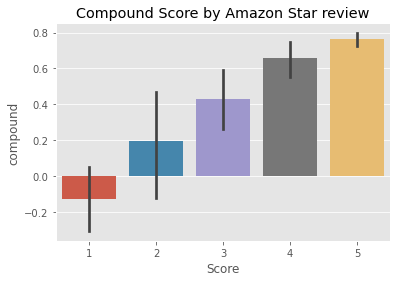

In [29]:
ax=sns.barplot(data=vaders,x='Score',y='compound')
ax.set_title('Compound Score by Amazon Star review')
plt.show()


Text(0.5, 1.0, 'Negative')

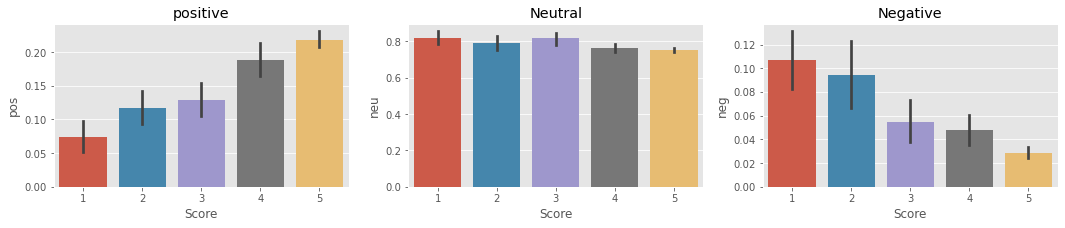

In [30]:
fig, axs = plt.subplots(1,3, figsize=(18,3))
sns.barplot(data=vaders,x='Score',y='pos',ax=axs[0])
sns.barplot(data=vaders,x='Score',y='neu',ax=axs[1])
sns.barplot(data=vaders,x='Score',y='neg',ax=axs[2])
axs[0].set_title('positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')


So positivity is higher in terms of stars and neutral is kind of flat and the negative goes down
it bwcomes less negative of a comet as star review becomes higher

Notre modèle précédent a juste regardé chaque mot de la phrase dans l'examen et a noté le mot individuellement, mais comme nous l'avons mentionné précédemment, nous savons que le langage humain dépend de beaucoup de contexte, donc si nous avons un monde négatif, il pourrait être lié à d'autres mots et être sarcastique .

In [44]:
#Step2=Roberta Pretrained Model

In [45]:
#we are going to import from transformers this is hugging faces library
from transformers import AutoModelForSequenceClassification
from transformers import TFAutoModelForSequenceClassification
from transformers import AutoTokenizer
import numpy as np
from scipy.special import softmax
#import csv
#import urllib.request

In [46]:
import torch

In [48]:
#task='offensive'
#This is provided by hugging face it will load it from a pre-trained model
MODEL = f"cardiffnlp/twitter-roberta-base"

tokenizer = AutoTokenizer.from_pretrained(MODEL)

In [49]:
model = AutoModelForSequenceClassification.from_pretrained(MODEL)


Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.dense.bias', 'lm_head.layer_norm.bias', 'lm_head.dense.weight', 'lm_head.decoder.bias', 'lm_head.decoder.weight', 'lm_head.layer_norm.weight', 'lm_head.bias', 'roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at cardiffnlp/twitter-roberta-base and

In [50]:
print(example)
sia.polarity_scores(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [51]:
#Run for Roberta Model
encoded_text=tokenizer(example,return_tensors='pt') 
output =model(**encoded_text)
scores=output[0][0].detach().numpy()
scores=softmax(scores)
scores_dict ={ 'raberta_neg':scores[0],'raberta_pos':scores[1]}


In [52]:
def polarity_scores_roberta(example):
    encoded_text=tokenizer(example,return_tensors='pt') 
    output =model(**encoded_text)
    scores=output[0][0].detach().numpy()
    scores=softmax(scores)
    scores_dict ={ 'raberta_neg':scores[0],'raberta_pos':scores[1]}
    
    return scores_dict


In [53]:
res ={}
for i, row in tqdm (df.iterrows(),total=len(df)):
    try:
        
        text = row['Text']
        myid = row['Id']
        vader_result =sia.polarity_scores(text)
    
        roberta_result= polarity_scores_roberta(text)
        both={**vader_result,**roberta_result}
        res[myid]=both
    except RuntimeError:
        print(f'Broke for id {myid}')
    
  


  0%|          | 0/500 [00:00<?, ?it/s]

Broke for id 83
Broke for id 187


In [56]:
vader_result

{'neg': 0.0, 'neu': 0.678, 'pos': 0.322, 'compound': 0.9811}

In [57]:
roberta_result

{'raberta_neg': 0.5625785, 'raberta_pos': 0.43742153}

In [61]:
#combine both of  results
{**vader_result,**roberta_result}

{'neg': 0.0,
 'neu': 0.678,
 'pos': 0.322,
 'compound': 0.9811,
 'raberta_neg': 0.5625785,
 'raberta_pos': 0.43742153}

In [62]:
result_df =pd.DataFrame(res).T
result_df =result_df.reset_index().rename(columns={'index':'Id'})
result_df =result_df.merge(df,how='left')


In [63]:
##Step3:compare Scores between models

In [64]:
result_df.columns


Index(['Id', 'neg', 'neu', 'pos', 'compound', 'raberta_neg', 'raberta_pos',
       'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

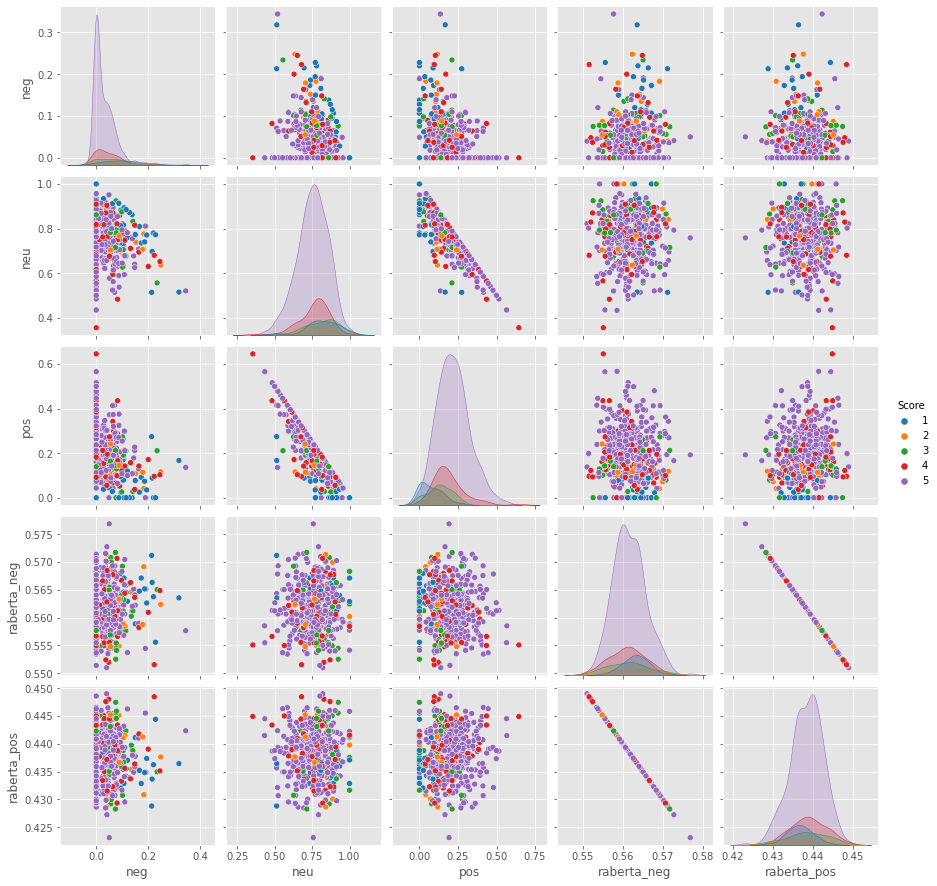

In [65]:
#pairplot lets us see comparison between each observation and what each feacher looks like
sns.pairplot(data=result_df,
             vars=['neg', 'neu', 'pos', 'raberta_neg', 'raberta_pos'],
             hue='Score',
             palette='tab10')
plt.show()

Some Example

In [66]:
result_df

,Id,neg,neu,pos,compound,raberta_neg,raberta_pos,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,0.563085,0.436915,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,0.561123,0.438877,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,0.567950,0.432050,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,0.560221,0.439779,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,0.560918,0.439082,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,496,0.000,0.554,0.446,0.9725,0.553684,0.446316,B000G6RYNE,APGAA43E3WPN7,Darren,0,0,5,1201392000,amazing chips,i rarely eat chips but i saw these and tried t...
494,497,0.059,0.799,0.142,0.7833,0.564035,0.435965,B000G6RYNE,ABR7HU5H1KNE,Keith,0,0,5,1196726400,Best Chip Ever,This is easily the best potato chip that I hav...
495,498,0.025,0.762,0.212,0.9848,0.566602,0.433398,B000G6RYNE,AJQD2WWJYOYFQ,bubbles,0,0,4,1186617600,"Tangy, spicy, and sweet- oh my!",Kettle Chips Spicy Thai potato chips have the ...
496,499,0.041,0.904,0.055,0.1280,0.562829,0.437171,B000G6RYNE,A16YH487W9ZYO0,Bruce G. Lindsay,0,0,4,1184198400,An indulgence with a bite,"Okay, I should not eat potato chips, nor shoul..."


In [74]:
result_df.query('Score == 5').sort_values('raberta_neg',ascending=False)['Text'].values[0]

'I ordered this product at the same time as the Kirkland Signature salmon.  The Raincoast Trading Co. salmon is very tasty, equally as good quality salmon as the Kirkland.  However, the Raincoast arrived in perfect condition, the Kirkland cans were dented badly.  I recommend this product to anyone who likes boneless skinless canned salmon.'

In [75]:
result_df.query('Score == 5').sort_values('neg',ascending=False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

In [76]:
#The Transformers Pipeline

In [77]:
from transformers import pipeline

In [78]:
sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)


Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/255M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

In [79]:
 sent_pipeline('I love sentiment analysis')

[{'label': 'POSITIVE', 'score': 0.999736487865448}]

In [80]:
sent_pipeline('This is so bad')

[{'label': 'NEGATIVE', 'score': 0.9997832179069519}]